In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-11 00:29:28--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-11 00:29:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.8’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.05s   

2024-11-11 00:29:29 (7.96 MB/s) - ‘jamb_exam_resu

In [4]:
data = 'jamb_exam_results.csv'
df = pd.read_csv(data)
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns, len(df.columns)

(Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
        'teacher_quality', 'distance_to_school', 'school_type',
        'school_location', 'extra_tutorials', 'access_to_learning_materials',
        'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
        'socioeconomic_status', 'parent_education_level',
        'assignments_completed'],
       dtype='object'),
 17)

In [6]:
del df['student_id']

In [7]:
df.columns, len(df.columns)

(Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
        'teacher_quality', 'distance_to_school', 'school_type',
        'school_location', 'extra_tutorials', 'access_to_learning_materials',
        'parent_involvement', 'it_knowledge', 'age', 'gender',
        'socioeconomic_status', 'parent_education_level',
        'assignments_completed'],
       dtype='object'),
 16)

In [8]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [9]:
df['parent_education_level'].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [10]:
df['parent_education_level'] = df['parent_education_level'].fillna(0)

In [11]:
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,18,Male,Medium,Secondary,1


In [12]:
# 80%          20% 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# 60%     20% 
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train['jamb_score'].values
y_val = df_val['jamb_score'].values
y_test = df_test['jamb_score'].values

In [15]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [16]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,Public,Urban,No,No,Low,High,17,Male,High,Secondary,1
2996,3,87,1,9.6,Public,Urban,No,No,Medium,Medium,17,Male,Medium,Primary,1
2997,17,96,4,13.7,Private,Urban,No,Yes,High,Medium,16,Male,Medium,Primary,2
2998,25,74,2,3.4,Public,Rural,No,No,High,High,21,Male,Low,Secondary,1


In [17]:
df_val

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,93,2,18.6,Public,Rural,Yes,Yes,Medium,High,16,Female,Low,Secondary,1
1,15,56,2,6.7,Public,Urban,No,Yes,Medium,Medium,17,Female,Medium,Secondary,1
2,20,73,3,12.8,Public,Urban,No,Yes,Medium,Medium,16,Female,Low,0,2
3,7,73,2,3.6,Public,Urban,Yes,No,Low,Medium,15,Male,Medium,Primary,1
4,26,83,3,6.2,Private,Urban,No,No,High,Low,19,Male,High,Tertiary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40,99,2,0.6,Public,Urban,Yes,Yes,Medium,Medium,18,Male,High,Tertiary,4
996,3,90,1,10.4,Public,Urban,Yes,Yes,Medium,High,19,Male,Low,0,1
997,38,77,2,10.2,Private,Rural,Yes,Yes,Medium,Low,17,Male,Low,0,5
998,11,98,2,12.2,Public,Rural,Yes,No,High,High,15,Female,Medium,Tertiary,1


In [18]:
df_test

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,17,99,4,10.3,Public,Urban,No,Yes,High,Medium,18,Female,Medium,Primary,1
1,15,57,3,12.0,Public,Rural,Yes,Yes,Medium,High,16,Female,Low,Secondary,1
2,27,94,3,16.5,Public,Rural,Yes,No,Low,Medium,20,Female,Low,0,2
3,13,82,2,0.0,Private,Urban,Yes,Yes,Medium,Medium,19,Female,Low,Primary,3
4,23,100,3,6.9,Public,Urban,Yes,Yes,Low,Low,22,Female,Medium,Secondary,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13,76,2,8.4,Public,Rural,No,No,Medium,Medium,18,Male,Low,Secondary,1
996,15,74,1,10.2,Public,Urban,No,No,Low,High,20,Female,Medium,0,1
997,22,92,4,0.0,Public,Urban,Yes,Yes,Medium,Medium,19,Male,Low,Secondary,3
998,12,68,2,6.5,Public,Urban,Yes,Yes,Low,Low,20,Female,Low,0,1


In [19]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.fit_transform(df_val.to_dict(orient='records'))

In [20]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [21]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [22]:
print(export_text(dtr, feature_names=dv.get_feature_names_out()))
# print(export_text(dtr))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [23]:
feature_index = dtr.tree_.feature[0] # 27
# dv.feature_names_[feature_index]
dv.get_feature_names_out()[feature_index]

'study_hours_per_week'

In [24]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
y_pred = rfr.predict(X_val)
error = np.sqrt(mean_squared_error(y_val, y_pred))
error

42.13724207871227

In [26]:
results = []
n_estimators_values = list(range(10, 201, 10))
for v in n_estimators_values:
    rfr = RandomForestRegressor(n_estimators=v, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    error = np.sqrt(mean_squared_error(y_val, y_pred))
    results.append((v, round(error, 3)))
results

[(10, 42.137),
 (20, 41.461),
 (30, 41.106),
 (40, 40.917),
 (50, 40.852),
 (60, 40.784),
 (70, 40.677),
 (80, 40.539),
 (90, 40.504),
 (100, 40.517),
 (110, 40.593),
 (120, 40.625),
 (130, 40.651),
 (140, 40.595),
 (150, 40.597),
 (160, 40.604),
 (170, 40.628),
 (180, 40.641),
 (190, 40.631),
 (200, 40.601)]

In [27]:
lowest = sorted(results, key=lambda x: x[1])[0]
lowest

(90, 40.504)

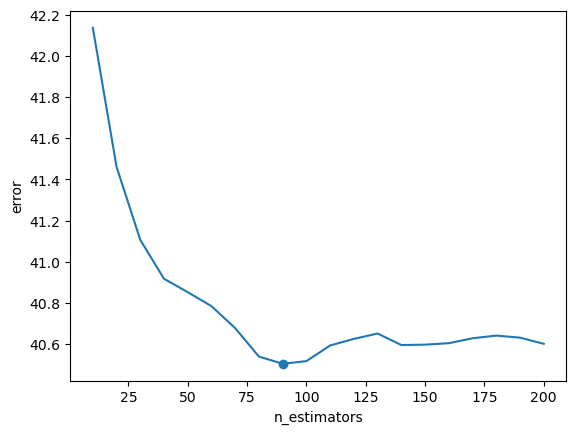

In [28]:
df_results = pd.DataFrame(results, columns=['n_estimators', 'error'])
plt.plot(df_results['n_estimators'], df_results['error'])
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.scatter(lowest[0], lowest[1])

In [29]:
results = []
n_estimators_values = list(range(10, 201, 10))
max_depth_values = [10, 15, 20, 25]
for m in max_depth_values:
    errors = []
    for v in n_estimators_values:
        rfr = RandomForestRegressor(n_estimators=v, max_depth=m, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        error = np.sqrt(mean_squared_error(y_val, y_pred))
        errors.append(error)
    results.append((m, sum(errors) / len(errors)))
results

[(10, 40.39249798892396),
 (15, 40.735281724863306),
 (20, 40.73973432182927),
 (25, 40.787865659628046)]

In [30]:
lowest = sorted(results, key=lambda x: x[1])[0]
lowest

(10, 40.39249798892396)

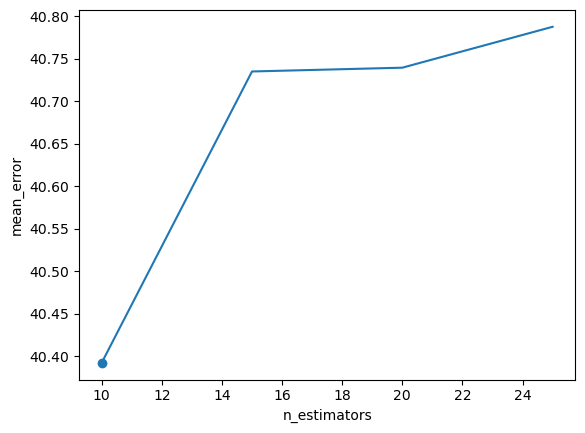

In [31]:
df_results = pd.DataFrame(results, columns=['n_estimators', 'mean_error'])
plt.plot(df_results['n_estimators'], df_results['mean_error'])
plt.xlabel('n_estimators')
plt.ylabel('mean_error')
plt.scatter(lowest[0], lowest[1])

In [32]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)
max_index = np.argmax(rfr.feature_importances_)
max_index, rfr.feature_importances_, dv.get_feature_names_out()[max_index]

(27,
 array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
        0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
        0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
        0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
        0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
        0.01070798, 0.01056268, 0.24835361, 0.08268222]),
 'study_hours_per_week')

In [33]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [34]:
%%capture output

eta = 0.3

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [35]:
def parse_xgb_output(output):
    results = []
    num_iter, train_rmse, val_rmse = [], [], []
    for line in output.stdout.strip().split('\n'):
        iter, t_rmse, v_rmse = line.split('\t')
        results.append((int(iter.strip('[]')), float(t_rmse.split(':')[1]), float(v_rmse.split(':')[1])))
    return pd.DataFrame(results, columns = ['num_iter','train_rmse','val_rmse'])

In [36]:
df_xgb = parse_xgb_output(output)
df_xgb

,num_iter,train_rmse,val_rmse
0,0,42.69384,44.89114
1,1,39.83326,43.07010
2,2,37.94542,42.00332
3,3,36.56125,41.46452
4,4,35.44252,40.88896
...,...,...,...
95,95,11.95568,43.37919
96,96,11.76819,43.39410
97,97,11.58218,43.40203
98,98,11.53812,43.40245


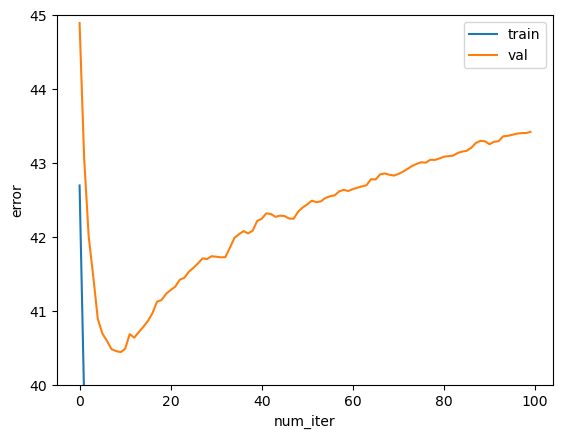

In [37]:
plt.plot(df_xgb.num_iter, df_xgb.train_rmse, label='train')
plt.plot(df_xgb.num_iter, df_xgb.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('error')
plt.ylim(40, 45)
plt.legend()

In [38]:
%%capture output

eta = 0.1

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [39]:
df_xgb = parse_xgb_output(output)
df_xgb

,num_iter,train_rmse,val_rmse
0,0,45.49999,47.00533
1,1,44.12948,45.92344
2,2,42.94858,44.98366
3,3,41.90896,44.25755
4,4,40.96728,43.57339
...,...,...,...
95,95,24.03404,40.99952
96,96,24.00230,41.00887
97,97,23.88940,41.05015
98,98,23.76232,41.06328


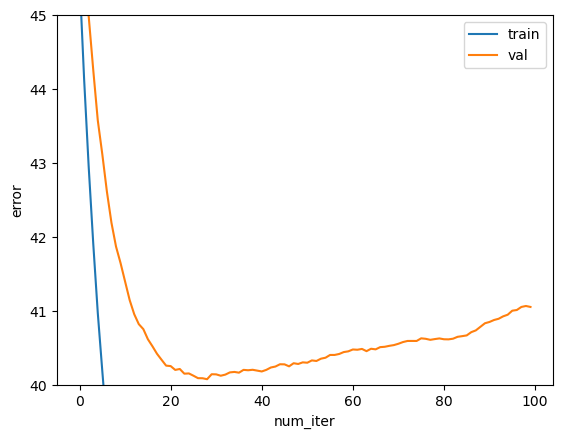

In [40]:
plt.plot(df_xgb.num_iter, df_xgb.train_rmse, label='train')
plt.plot(df_xgb.num_iter, df_xgb.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('error')
plt.ylim(40, 45)
plt.legend()